# Clean and Analyse the Dataset


In [1]:
import os
import pandas as pd
import logging
import matplotlib.pyplot as plt

In [2]:
file_path = os.path.join("../data/raw/sales_data.csv")
cleaned_file_path = os.path.join("..", "data", "processed", "sales_data_cleaned.csv")
log_file_path = os.path.join("..", "log", "sales_data_cleaning.log")

In [3]:
# Configure logging
logging.basicConfig(filename=log_file_path, level=logging.INFO)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=";")

# log the number of rows and columns
logging.info(f"Initial number of rows: {df.shape[0]}")
logging.info(f"Initial number of columns: {df.shape[1]}")

# Rename columns
df.rename(
    columns={
        "TransactionID": "transaction_id",
        "ProductID": "product_id",
        "Quantity": "quantity",
        "SalePrice": "sale_price",
        "PurchasePrice": "purchase_price",
    },
    inplace=True,
)


logging.info("Columns renamed successfully.")


# Function to log dropped rows' transaction IDs
def log_dropped_rows(df, operation):
    dropped_transaction_ids = df.index.tolist()
    logging.info(
        f"{len(dropped_transaction_ids)} rows dropped during {operation}: {dropped_transaction_ids}"
    )


# Drop non-numeric rows from all columns
for col in df.columns:
    non_numeric_rows = df[pd.to_numeric(df[col], errors="coerce").isnull()]
    log_dropped_rows(non_numeric_rows, f"dropping non-numeric rows in column '{col}'")
    df = df[pd.to_numeric(df[col], errors="coerce").notnull()]


# Drop rows with missing values
missing_values = df[df.isnull().any(axis=1)]
df = df.dropna()
log_dropped_rows(missing_values, "dropping rows with missing values")

# Drop duplicate rows
duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()
log_dropped_rows(duplicate_rows, "dropping duplicate rows")

# Convert columns to the correct data types
df["transaction_id"] = df["transaction_id"].astype(int)
df["product_id"] = df["product_id"].astype(int)
df["quantity"] = df["quantity"].astype(int)
df["sale_price"] = df["sale_price"].astype(float)
df["purchase_price"] = df["purchase_price"].astype(float)


logging.info("Columns converted to correct data types.")

logging.info(f"Number of rows after cleaning: {df.shape[0]}")
logging.info(f"Number of columns after cleaning: {df.shape[1]}")

In [4]:
# Save the cleaned data to a new CSV file
df.to_csv(cleaned_file_path, index=False)

print("Data cleaning is done and saved in the file: ", cleaned_file_path)
print("Log file is saved in the file: ", log_file_path)

Data cleaning is done and saved in the file:  ..\data\processed\sales_data_cleaned.csv
Log file is saved in the file:  ..\log\sales_data_cleaning.log


# Analyse Sale Vs Quantity

- Loaded 5 random products from the dataset and plotted the Sale Price vs Quantity for each product.
- Based on the Visualisation, the result indicates that the sale price gets lower as the quantity increases.
- Also for most of the products the sale price becomes same after a certain quantity.

Total sales for product ID 1140: 2678.57


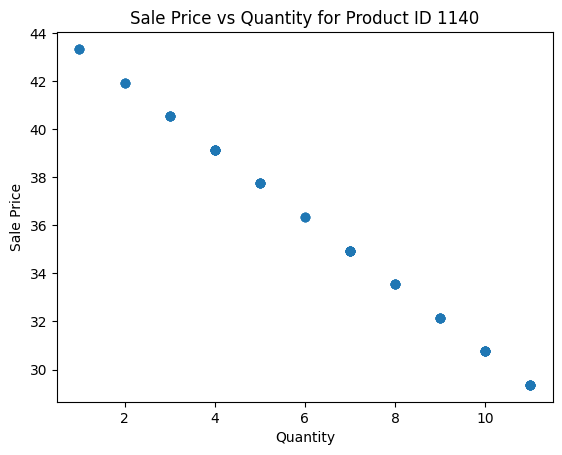

Total sales for product ID 1146: 1745.92


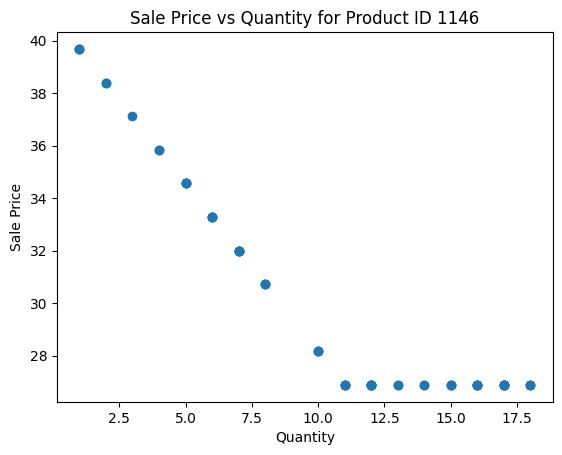

Total sales for product ID 1103: 484.23


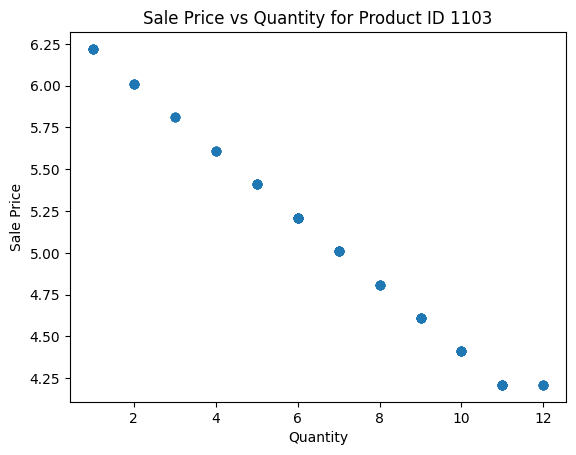

Total sales for product ID 1117: 860.32


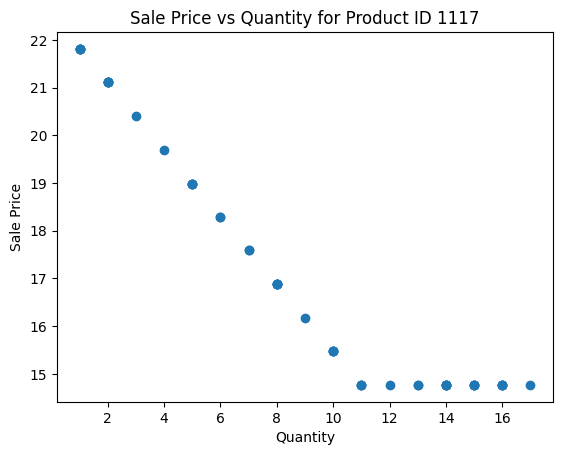

Total sales for product ID 1134: 1842.63


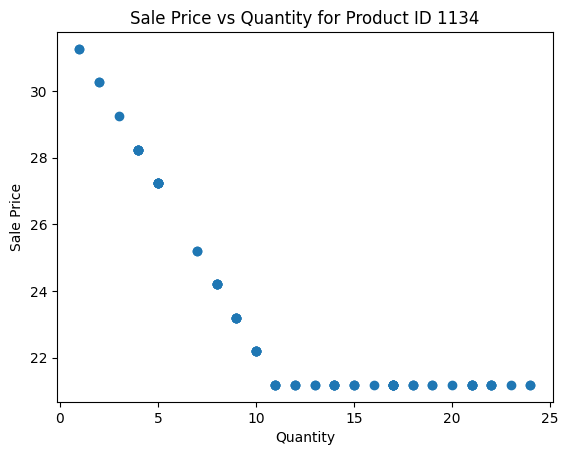

In [5]:
sample_product_ids = df.product_id.sample(5)
df_anaylse = df.groupby('transaction_id')

# analyse the data sales price vs  quantity with sample_product_ids
for product_id in sample_product_ids:
    total_sales = df[df.product_id == product_id]["sale_price"].sum()
    print(f"Total sales for product ID {product_id}: {total_sales:.2f}")

    product_data = df[df.product_id == product_id]
    plt.scatter(product_data["quantity"], product_data["sale_price"])
    plt.xlabel("Quantity")
    plt.ylabel("Sale Price")
    plt.title(f"Sale Price vs Quantity for Product ID {product_id}")
    plt.show()

